In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import sklearn
import sklearn.datasets
from sklearn.model_selection import cross_val_score
from sklearn.metrics import log_loss
from sklearn.model_selection import StratifiedKFold
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix

In [3]:
df_train = pd.read_csv('/content/drive/MyDrive/PG32 CS3244/smoteNCTrain.csv')
df_test = pd.read_csv('/content/drive/MyDrive/PG32 CS3244/smoteNCTest.csv')

In [4]:
y_train = df_train.iloc[:,-1] # labels

y_test = df_test.iloc[:,-1] # labels

df_total = df_train.append(df_test)

In [5]:
df_train.shape

(50164, 15)

In [6]:
X = df_total.iloc[:,1:-1] # all the variables
X_train = df_train.iloc[:,1:-1] # all the variables
y_train = df_train.iloc[:,-1] # labels

X_test = df_test.iloc[:,1:-1] # all the variables
y_test = df_test.iloc[:,-1] # labels

In [7]:
X_encoded = pd.get_dummies(X, columns=['FLAG_OWN_CAR', 
                                                   'FLAG_OWN_REALTY',
                                                   'NAME_INCOME_TYPE',
                                                   'NAME_EDUCATION_TYPE',
                                                   'NAME_FAMILY_STATUS',
                                                   'NAME_HOUSING_TYPE',
                                                   'FLAG_WORK_PHONE',
                                                   'OCCUPATION_TYPE',
                                                   ])
X_encoded

,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,CNT_FAM_MEMBERS,FLAG_OWN_CAR_0,FLAG_OWN_CAR_1,FLAG_OWN_REALTY_0,FLAG_OWN_REALTY_1,NAME_INCOME_TYPE_0,...,OCCUPATION_TYPE_9,OCCUPATION_TYPE_10,OCCUPATION_TYPE_11,OCCUPATION_TYPE_12,OCCUPATION_TYPE_13,OCCUPATION_TYPE_14,OCCUPATION_TYPE_15,OCCUPATION_TYPE_16,OCCUPATION_TYPE_17,OCCUPATION_TYPE_18
0,0,135000.000000,-13566,-1900,2,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,315000.000000,-10328,-543,1,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,0,315000.000000,-18184,-3021,1,0,1,0,1,1,...,0,0,0,0,0,0,0,0,0,0
3,1,180000.000000,-13467,-3850,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,0,0
4,1,247500.000000,-13086,-1931,3,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21513,0,81000.000000,-23902,365243,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
21514,0,75177.780415,-15530,-451,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
21515,0,180000.000000,-10949,-1363,2,0,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
21516,0,202500.000000,-13881,-1157,2,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#scale before

from sklearn.preprocessing import scale
X_scaled = scale(X_encoded)
X_train_scaled = X_scaled[0:50164]
X_test_scaled = X_scaled[50164:]

#print(X_train_encoded.shape) 
#print(X_test_encoded.shape)

In [ ]:
X_train = X_train_scaled
X_test = X_test_scaled

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(50,100,150), max_iter=300,activation = 'logistic',solver='sgd',random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict))) # very bad recall...
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

11075
Accuracy Score is 0.51469
Recall Score is 0.97323
Precision Score is 0.50766
F1 Score is 0.66726
     0      1
0  604  10155
1  288  10471


In [ ]:
X_train = X_train_scaled
X_test = X_test_scaled

from sklearn.neural_network import MLPClassifier
model = MLPClassifier(hidden_layer_sizes=(30,20), max_iter=300,activation = 'relu',solver='sgd',random_state=42)
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict))) # very bad recall...
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

15249
Accuracy Score is 0.70866
Recall Score is 0.51919
Precision Score is 0.83598
F1 Score is 0.64056
      0     1
0  9663  1096
1  5173  5586


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (300) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 50164 samples in 0.003s...
[t-SNE] Computed neighbors for 50164 samples in 60.507s...
[t-SNE] Computed conditional probabilities for sample 1000 / 50164
[t-SNE] Computed conditional probabilities for sample 2000 / 50164
[t-SNE] Computed conditional probabilities for sample 3000 / 50164
[t-SNE] Computed conditional probabilities for sample 4000 / 50164
[t-SNE] Computed conditional probabilities for sample 5000 / 50164
[t-SNE] Computed conditional probabilities for sample 6000 / 50164
[t-SNE] Computed conditional probabilities for sample 7000 / 50164
[t-SNE] Computed conditional probabilities for sample 8000 / 50164
[t-SNE] Computed conditional probabilities for sample 9000 / 50164
[t-SNE] Computed conditional probabilities for sample 10000 / 50164
[t-SNE] Computed conditional probabilities for sample 11000 / 50164
[t-SNE] Computed conditional probabilities for sample 12000 / 50164
[t-SNE] Computed conditional probabilities for sa

[Text(0.5, 1.0, 'Iris data T-SNE projection')]

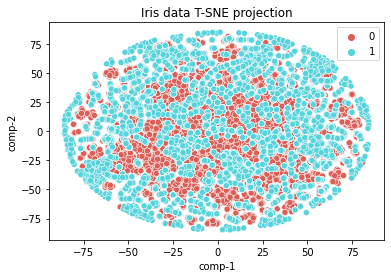

In [ ]:
from sklearn.manifold import TSNE
from keras.datasets import mnist
from sklearn.datasets import load_iris
from numpy import reshape
import seaborn as sns
import pandas as pd  

x = X_train
y = y_train
tsne = TSNE(n_components=2, verbose=1, random_state=42)
z = tsne.fit_transform(x) 

df = pd.DataFrame()
df["y"] = y
df["comp-1"] = z[:,0]
df["comp-2"] = z[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title="T-SNE projection") 

In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(random_state=42,C=10,kernel='linear')
clf_svm.fit(X_train, y_train)

SVC(C=10, kernel='linear', random_state=42)

In [ ]:
y_predict = clf_svm.predict(X_test_scaled)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict))) 
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

13863
Accuracy Score is 0.64425
Recall Score is 0.80946
Precision Score is 0.60843
F1 Score is 0.69469


In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(random_state=42,C=10,kernel='rbf',gamma=0.001)

clf_svm.fit(X_train, y_train)
y_predict = clf_svm.predict(X_test_scaled)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict))) 
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

14406
Accuracy Score is 0.66949
Recall Score is 0.69319
Precision Score is 0.66182
F1 Score is 0.67714


In [ ]:
from sklearn.svm import SVC
clf_svm = SVC(random_state=42,C=10,kernel='rbf',gamma=0.01)

clf_svm.fit(X_train, y_train)
y_predict = clf_svm.predict(X_test_scaled)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict))) # very bad recall...
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

15196
Accuracy Score is 0.7062
Recall Score is 0.581
Precision Score is 0.77508
F1 Score is 0.66415


In [ ]:
from sklearn.svm import SVC
model = SVC(random_state=42,kernel='linear')
model.fit(X_train, y_train)

y_predict = model.predict(X_test)
print(classification_report(y_test, y_predict))
print(pd.DataFrame(confusion_matrix(y_test,y_predict)))

from sklearn.model_selection import GridSearchCV
param_space = {'C': [0.1,1, 10, 100], 'gamma': [1,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}


clf = GridSearchCV(model, param_space, n_jobs=-1, cv=10)
#clf.fit(X_train, y_train)

print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

#### Logistic Regression

In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix
print("--------LR-------")
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=42,C=1)
model.fit(X_train_scaled, y_train)


y_predict = model.predict(X_test_scaled)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict))) # very bad recall...
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

--------LR-------
13991
Accuracy Score is 0.6502
Recall Score is 0.74394
Precision Score is 0.62649
F1 Score is 0.68018


In [ ]:
print("--------Decision Tree--------")
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(random_state = 42,)

model.fit(X_train_scaled, y_train)

y_predict = model.predict(X_test_scaled)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

--------Decision Tree--------
15387
Accuracy Score is 0.71508
Recall Score is 0.45032
Precision Score is 0.95713
F1 Score is 0.61248


In [ ]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, plot_confusion_matrix

y_predict = clf_svm.predict(X_test_scaled)
print(sum(y_predict == y_test))
print('Accuracy Score is {:.5}'.format(accuracy_score(y_test, y_predict)))
print('Recall Score is {:.5}'.format(recall_score(y_test, y_predict)))
print('Precision Score is {:.5}'.format(precision_score(y_test, y_predict)))
print('F1 Score is {:.5}'.format(f1_score(y_test, y_predict)))

13687
Accuracy Score is 0.63607
Recall Score is 0.35115
Precision Score is 0.81634
F1 Score is 0.49106
